In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import xgboost as xgb
from imblearn.over_sampling import SMOTEN
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, precision_score, precision_recall_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, average_precision_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from imblearn.under_sampling import TomekLinks


In [2]:
pd.set_option('display.max_columns', None)
np.random.seed(1973) 

In [3]:
# df = pd.read_csv(r"C:\Users\xtaym\OneDrive\Pulpit\mgr\cell2celltrain.csv")
# holdout_innit = pd.read_csv(r""C:\Users\xtaym\OneDrive\Pulpit\cell2cell-duke univeristy.csv"mgr\cell2cellholdout.csv")
# df=pd.read_csv(r'C:\Users\xtaym\OneDrive\Pulpit\cell2cell-duke univeristy.csv')
df=pd.read_csv(r'C:\Users\xtaym\Desktop\telco.csv')

In [4]:
df.head(3)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer


In [5]:
df=df.drop(columns='Satisfaction Score')
df=df.drop(columns='Contract')

In [6]:
cols_to_drop=['customer_id','zip_code','country','state','latitude','longitude','city','quarter','churn_reason','churn_category','churn_score','customer_status']

In [7]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df=df.drop(columns=cols_to_drop)

In [8]:
df.head(3)

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv
0,Male,78,No,Yes,No,No,0,68701,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Yes,5433
1,Female,74,No,Yes,Yes,Yes,1,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Yes,5302
2,Male,71,No,Yes,No,Yes,3,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Yes,3179


In [9]:
df['churn_label'].value_counts()

churn_label
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
df[df.duplicated()]

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv


# EDA

In [11]:
# Split the data into training and testing sets
df, holdout_df = train_test_split(df, test_size=0.15, random_state=1973)

In [12]:
print(f'for test and training we have {len(df)} records and for holdout we have {len(holdout_df)} records, both data sets have {len(df.columns)} variables')

for test and training we have 5986 records and for holdout we have 1057 records, both data sets have 36 variables


In [13]:
df.head(2)

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv
876,Male,79,No,Yes,Yes,No,0,9423,Yes,7,67,Offer A,Yes,42.07,No,Yes,Cable,12,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Bank Withdrawal,60.95,4119.4,17.19,0,2818.69,6920.9,No,5792
6169,Male,59,No,No,No,No,0,14859,No,0,34,NaN,No,0.00,No,Yes,Cable,28,No,No,No,No,No,No,No,Yes,Yes,Bank Withdrawal,25.05,852.7,0.00,0,0.00,852.7,No,3800


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 876 to 4393
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             5986 non-null   object 
 1   age                                5986 non-null   int64  
 2   under_30                           5986 non-null   object 
 3   senior_citizen                     5986 non-null   object 
 4   married                            5986 non-null   object 
 5   dependents                         5986 non-null   object 
 6   number_of_dependents               5986 non-null   int64  
 7   population                         5986 non-null   int64  
 8   referred_a_friend                  5986 non-null   object 
 9   number_of_referrals                5986 non-null   int64  
 10  tenure_in_months                   5986 non-null   int64  
 11  offer                              2723 non-null   object 


In [15]:
df.describe()

,age,number_of_dependents,population,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,cltv
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,46.487638,0.470264,22200.847812,1.949549,32.463081,23.058806,20.553458,64.844470,2284.340226,1.925867,6.705647,755.727427,3044.847432,4402.788339
std,16.767791,0.964985,21164.439218,2.997096,24.579363,15.461291,20.465613,30.055413,2263.845618,7.831511,24.822294,852.298388,2868.484492,1184.514320
min,19.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.400000,2003.000000
25%,32.000000,0.000000,2324.500000,0.000000,9.000000,9.272500,3.000000,35.612500,400.075000,0.000000,0.000000,71.460000,606.925000,3477.250000
50%,46.000000,0.000000,17621.000000,0.000000,29.000000,22.970000,17.000000,70.400000,1398.125000,0.000000,0.000000,408.825000,2122.615000,4530.000000
75%,60.000000,0.000000,36125.000000,3.000000,56.000000,36.470000,27.000000,89.850000,3823.762500,0.000000,0.000000,1201.805000,4830.550000,5384.000000
max,80.000000,9.000000,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8672.450000,49.790000,150.000000,3564.720000,11979.340000,6500.000000


In [16]:
df.shape

(5986, 36)

## DEP VARIABLE

In [17]:
holdout_df['churn_label'].value_counts()

churn_label
No     766
Yes    291
Name: count, dtype: int64

In [18]:
holdout_df.describe()

,age,number_of_dependents,population,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,cltv
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,46.634816,0.459792,21792.763482,1.964995,31.954588,22.393472,20.299905,64.292904,2257.960880,2.167843,7.738884,711.562649,2975.094570,4386.179754
std,16.658588,0.950748,21090.675578,3.025727,24.336767,15.368317,20.160810,30.295470,2280.570087,8.294653,26.644687,813.363980,2847.182039,1175.228477
min,19.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,18.700000,18.850000,0.000000,0.000000,0.000000,21.360000,2007.000000
25%,33.000000,0.000000,2349.000000,0.000000,9.000000,8.600000,4.000000,34.700000,401.300000,0.000000,0.000000,61.230000,591.850000,3410.000000
50%,46.000000,0.000000,16849.000000,0.000000,29.000000,21.670000,17.000000,70.100000,1386.800000,0.000000,0.000000,365.850000,1950.290000,4516.000000
75%,60.000000,0.000000,36125.000000,3.000000,53.000000,35.670000,27.000000,89.900000,3625.200000,0.000000,0.000000,1141.200000,4681.620000,5352.000000
max,80.000000,6.000000,105285.000000,11.000000,72.000000,49.950000,85.000000,117.800000,8684.800000,49.570000,150.000000,3443.760000,11564.370000,6499.000000


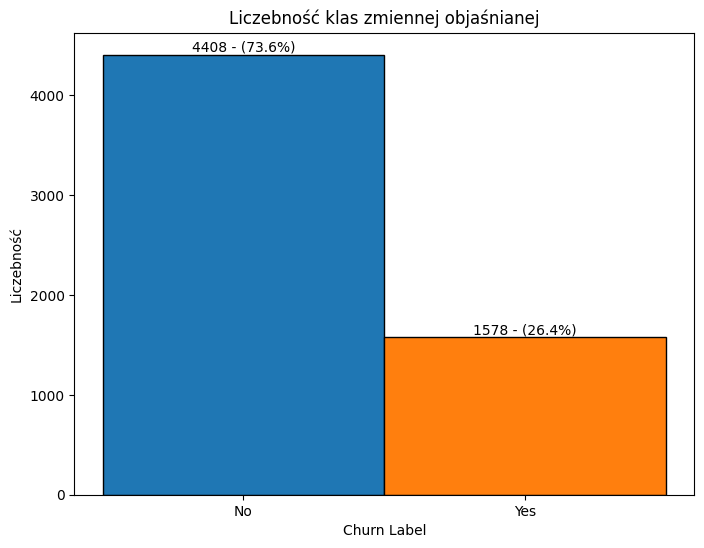

In [65]:
plt.figure(figsize=(8, 6))

# Create the histogram
hist = sns.histplot(df['churn_label'], kde=False)

# Set colors for the bars
colors = ['#1f77b4', '#ff7f0e']  # Customize these colors
for patch, color in zip(hist.patches, colors):
    patch.set_facecolor(color)

# Add labels above the bars
total = len(df['churn_label'])
for patch in hist.patches:
    height = patch.get_height()
    percentage = height / total * 100
    plt.text(
        patch.get_x() + patch.get_width() / 2, 
        height, 
        f'{int(height)} - ({percentage:.1f}%)', 
        ha="center", va="bottom"
    )

# Customizing the plot
plt.ylabel("Liczebność")
plt.xlabel("Churn Label")
plt.title("Liczebność klas zmiennej objaśnianej")

plt.show()

## NA/DUPLICATE HANDLING

In [20]:
df[df.columns[df.isna().sum() > 0]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 876 to 4393
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   offer          2723 non-null   object
 1   internet_type  4693 non-null   object
dtypes: object(2)
memory usage: 140.3+ KB


In [21]:
df.offer.unique()

array(['Offer A', nan, 'Offer E', 'Offer D', 'Offer B', 'Offer C'],
      dtype=object)

In [22]:
df.internet_type.unique()

array(['Cable', 'DSL', 'Fiber Optic', nan], dtype=object)

In [23]:
df['offer'].fillna('no_info', inplace=True)
df['internet_type'].fillna('no_info', inplace=True)

## FEATURES

In [127]:
def plot_eda(columns, df_fun=df, num_cols=2, plt_type='hist', bin_num=30, col_labels=False):
    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]
        
        # Plot the histogram for the entire column
        ax.hist(df_fun[col], bins=bin_num, edgecolor='black', color='#007481')
        
        ax.set_title(f'Rozkład zm. {col}')
        ax.set_ylabel('Liczebność')
        ax.grid(True)

        if col_labels is True:
            ax.set_xlabel(col)
        else: 
            ax.set_xlabel('')
        
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [68]:
def plot_eda_binary(columns, df_fun=df, num_cols=2, col_labels=False):
    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]

        # Calculate the frequencies for the column
        data_counts = df_fun[col].value_counts().sort_index()
        bar_positions = np.arange(len(data_counts))  # Positions for the bars

        # Plot the bars without splitting by churn column
        ax.bar(bar_positions, data_counts, width=0.6, color='#007481', edgecolor='black')

        ax.set_title(f'{col}')
        ax.set_ylabel('Liczebność')
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(data_counts.index, rotation=45)  # Rotate labels for readability
        ax.grid(True)

        if col_labels is True:
            ax.set_xlabel(col)
        else: 
            ax.set_xlabel('')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [69]:
def plot_bivar_density(columns, df_fun=df, num_cols=2, churn_col='churn_label', col_labels=False):
    # Get the unique values of the churn column
    churn_values = df_fun[churn_col].unique()
    colors = ['blue', 'orange']  # Colors for different churn categories

    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]

        for j, churn_val in enumerate(churn_values):
            # Plot the density plot
            sns.kdeplot(df_fun[df_fun[churn_col] == churn_val][col], 
                        ax=ax, 
                        color=colors[j], 
                        label=f'Churn: {churn_val}',
                        fill=True)  # fill=True adds shading under the curve

        ax.set_title(f'Wykres gęstości {col}')
        ax.set_ylabel('udział')
        ax.grid(True)
        ax.legend()  # Add legend to differentiate churn categories

        if col_labels:
            ax.set_xlabel(col)
        else:
            ax.set_xlabel('')
        
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [70]:
numerical_cols = [col for col in df.select_dtypes(include=['number']).columns if df[col].nunique() >= 3]
# numerical_cols = [col for col in numerical_cols if col not in ['number_of_dependents']]

In [71]:
binary_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() == 2 and col != 'churn_label']

In [72]:
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() > 2 and col != 'churn_label']

In [73]:
print(f"""
num of num cols: {len(numerical_cols)}
num of binary cols: {len(binary_cols)}
num of cat cols: {len(cat_cols)}""")


num of num cols: 14
num of binary cols: 18
num of cat cols: 3


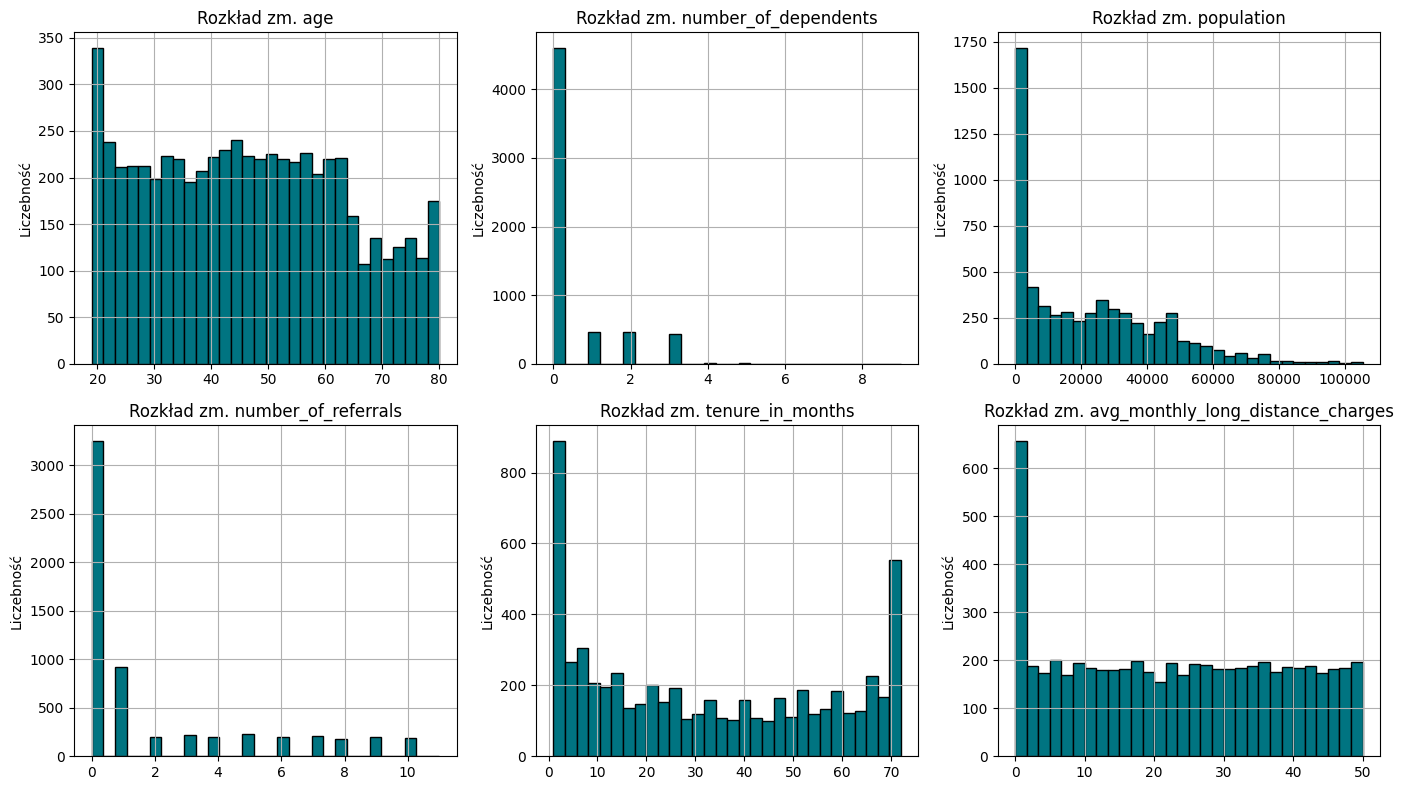

In [84]:
plot_eda(numerical_cols[0:6],num_cols=3)

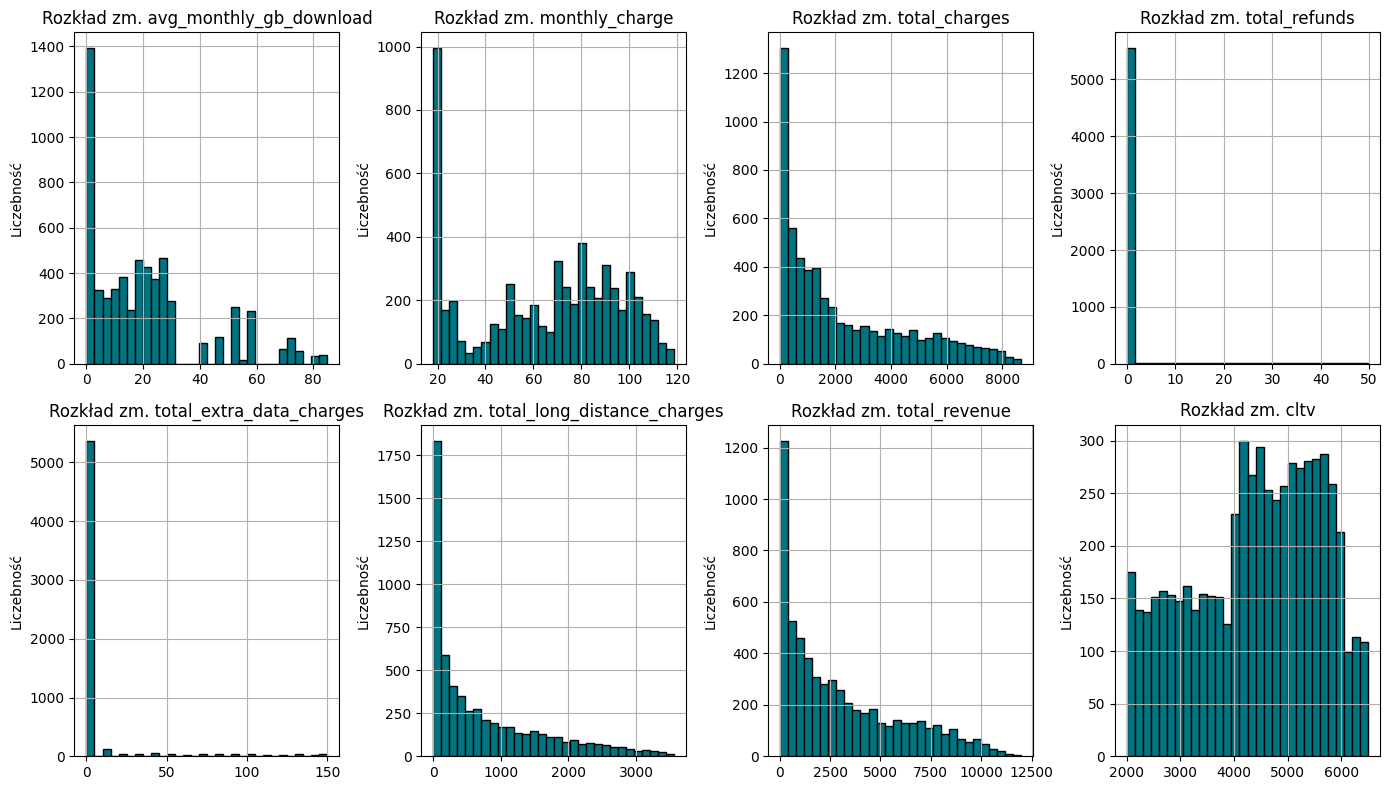

In [131]:
plot_eda(numerical_cols[6:],num_cols=4,bin_num=30)

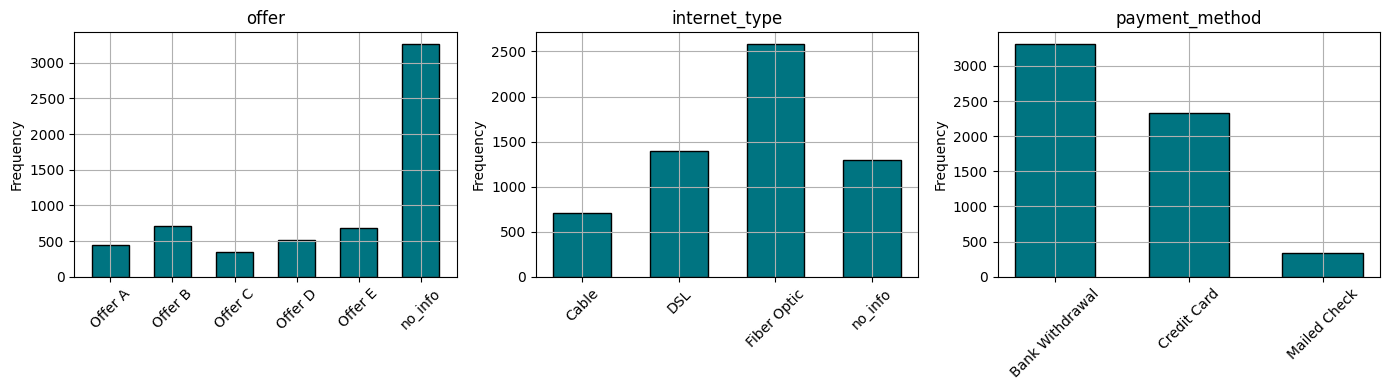

In [33]:
plot_eda_binary(cat_cols,num_cols=3)

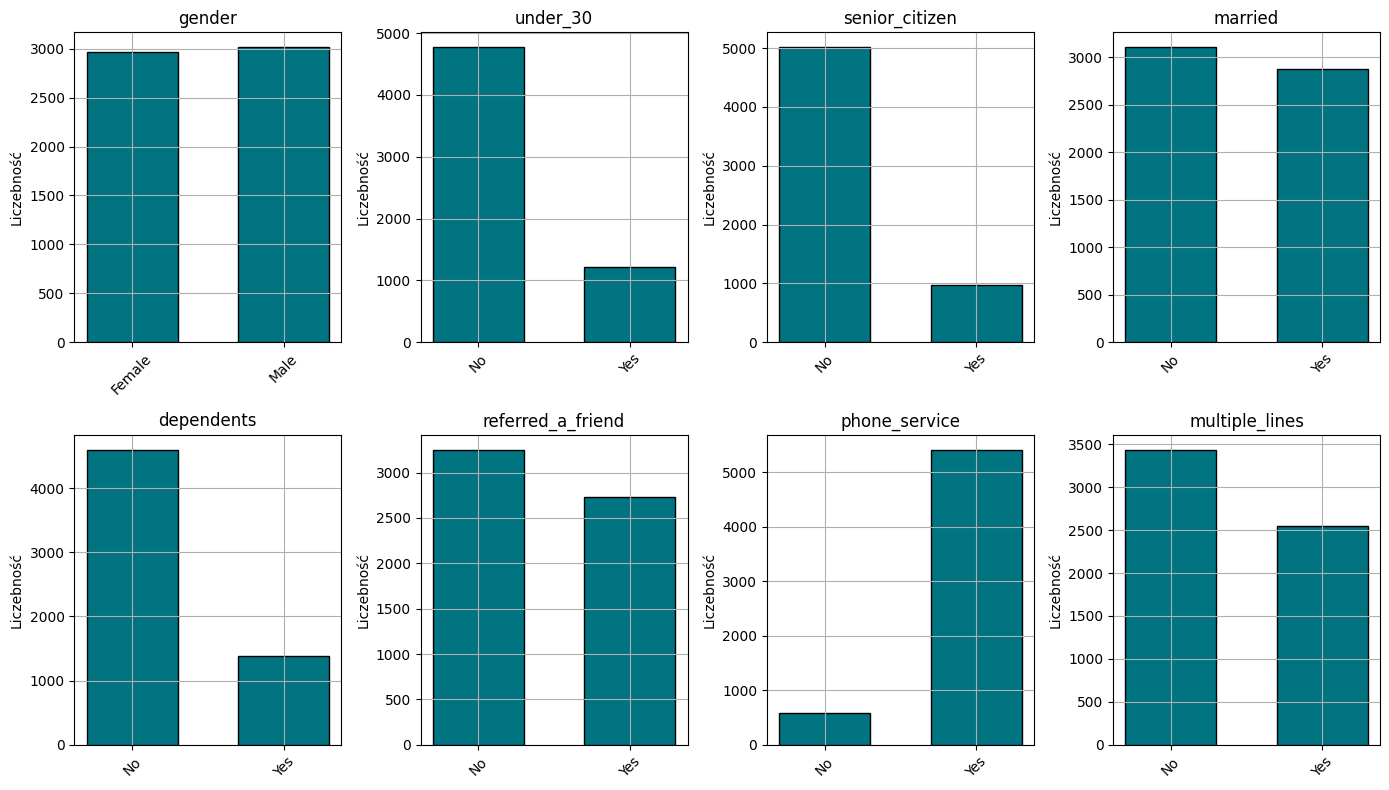

In [109]:
plot_eda_binary(binary_cols[0:8],num_cols=4,col_labels=False)

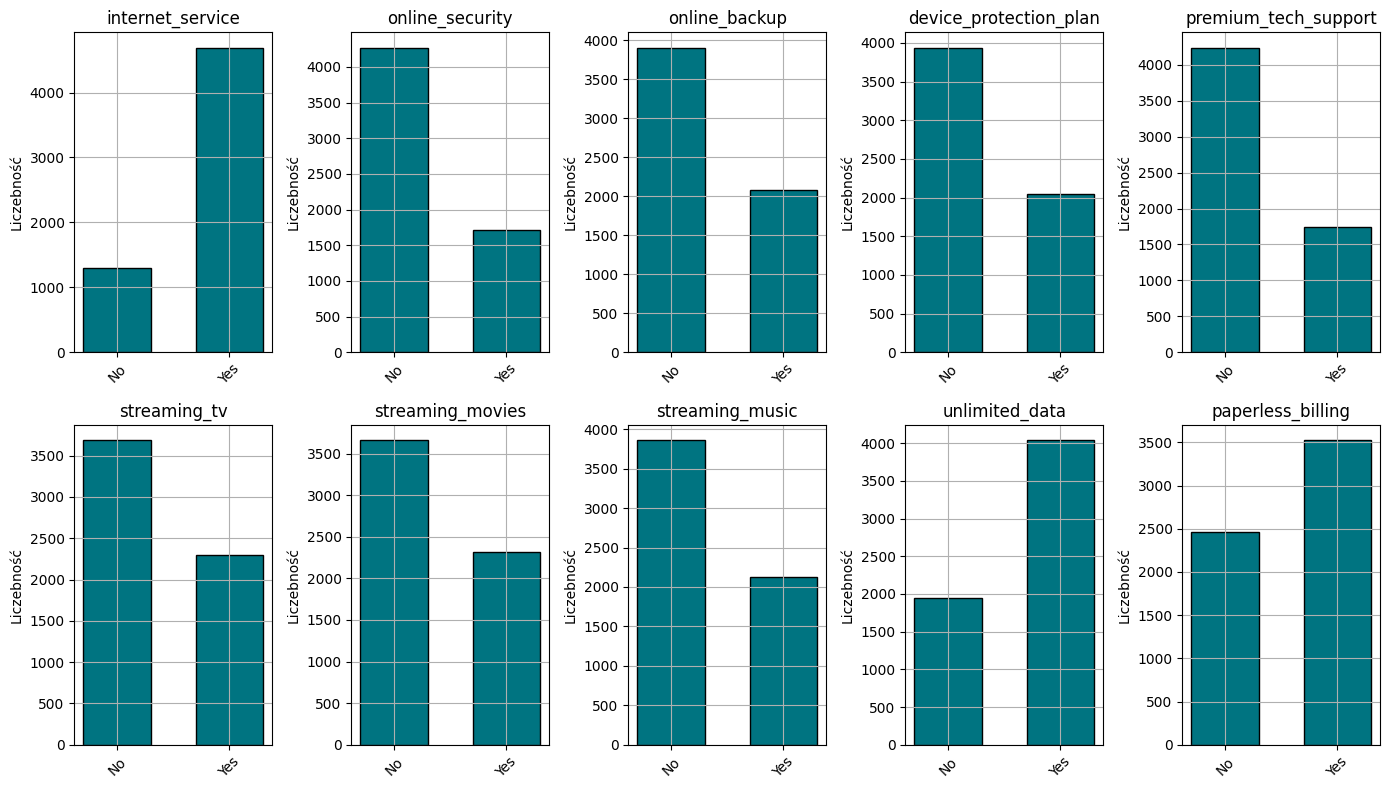

In [126]:
plot_eda_binary(binary_cols[8:],num_cols=5,col_labels=False)

# Data Transformation

In [119]:
5986-2723

3263

In [118]:
1-2723/5986
#offer

0.5451052455730037

In [125]:
df.internet_service.value_counts()

internet_service
Yes    4693
No     1293
Name: count, dtype: int64

In [122]:
5986-4693

1293

In [117]:
1-4693/5986
# iint type

0.21600400935516206

### feature engineering  

In [ ]:
df['number_of_dependents'] = df['number_of_dependents'].apply(lambda x: '3/3+' if x >= 3 else x)
df['number_of_dependents'] = df['number_of_dependents'].astype(str)

In [ ]:
plot_eda_binary('number_of_dependents',num_cols=1)

In [140]:
from scipy import stats

In [134]:
df.total_long_distance_charges.skew()

1.2319063143622475

In [135]:
df.total_charges.skew()


0.9575061113994016

In [137]:
df.total_revenue.skew()

0.9149760277288079

In [133]:
df.avg_monthly_gb_download.skew()


1.2121056904081917

In [1040]:
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

# Fit and transform only the categorical columns listed in cat_cols
encoded_df = pd.DataFrame(encoder.fit_transform(df[cat_cols]))

# Get the original column names and assign them to the encoded dataframe
encoded_df.columns = encoder.get_feature_names_out(cat_cols)

# Drop the original categorical columns and concatenate the encoded columns
df = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [1041]:
df.head(2)

,gender,age,under_30,senior_citizen,married,dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv,number_of_dependents_0,number_of_dependents_1,number_of_dependents_2,number_of_dependents_3/3+,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,offer_no_info,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_no_info,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check
0,Male,79,No,Yes,Yes,No,9423,Yes,7,67,Yes,42.07,No,Yes,12,Yes,Yes,No,Yes,No,No,No,Yes,Yes,60.95,4119.4,17.19,0,2818.69,6920.9,No,5792,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Male,59,No,No,No,No,14859,No,0,34,No,0.00,No,Yes,28,No,No,No,No,No,No,No,Yes,Yes,25.05,852.7,0.00,0,0.00,852.7,No,3800,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1042]:
df = df.replace({"No": False, "Yes": True})

In [1043]:
df.shape

(5986, 49)

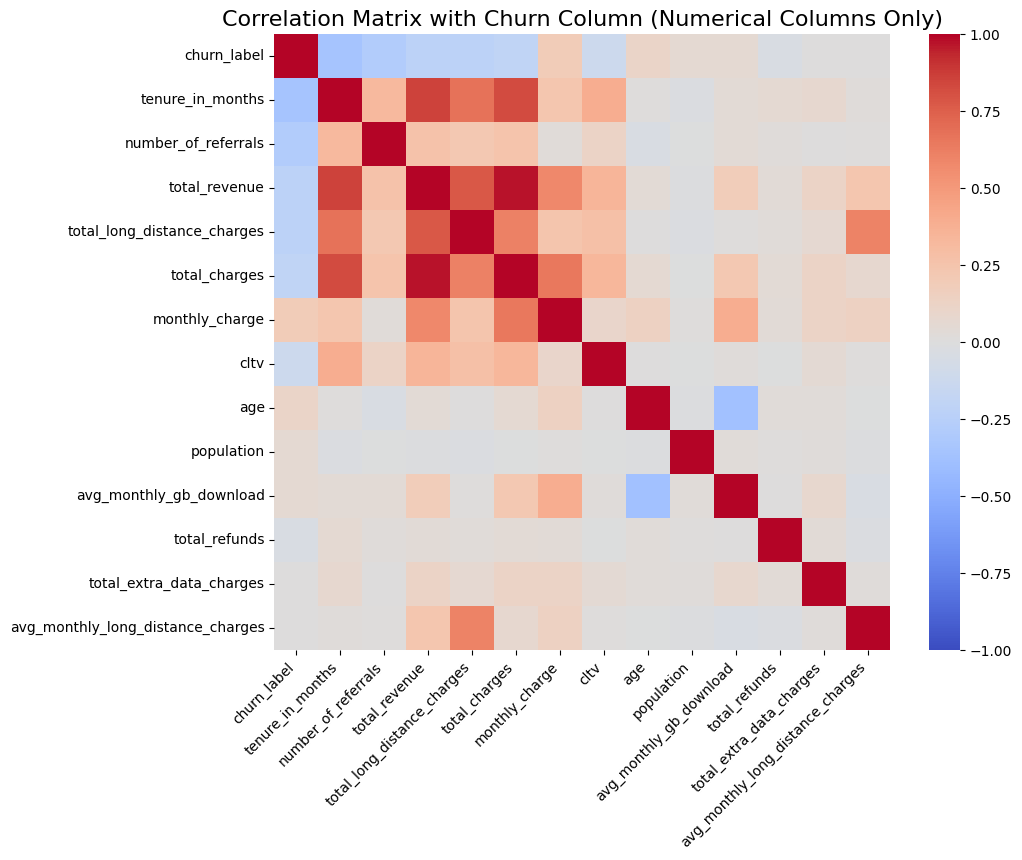

In [1045]:
numerical_cols.append('churn_label')
corr_matrix = df[numerical_cols].corr()

# Extract the correlations involving the churn column (assuming 'churn_label_Yes' is in numerical_cols)
columns_of_interest = corr_matrix['churn_label'].abs().sort_values(ascending=False).index
selected_corr_matrix = corr_matrix.loc[columns_of_interest, columns_of_interest]

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Correlation Matrix with Churn Column (Numerical Columns Only)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

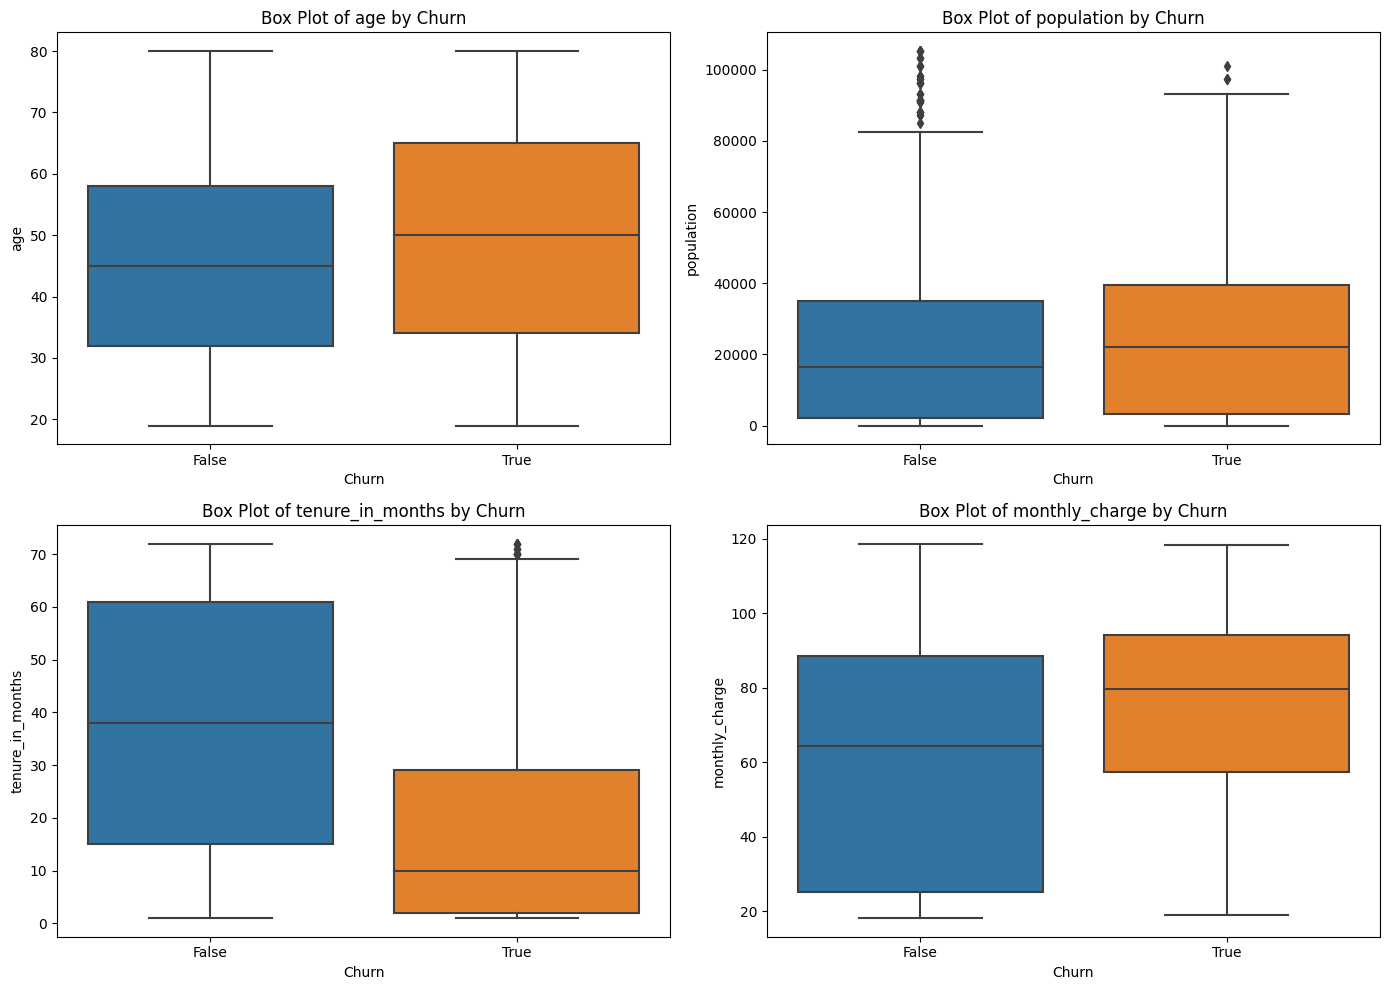

In [1082]:
columns_to_plot = ['age', 'population', 'tenure_in_months', 'monthly_charge']

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and create box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df['churn_label'], y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [1047]:
df = df.replace({"Female": False, "Male": True})

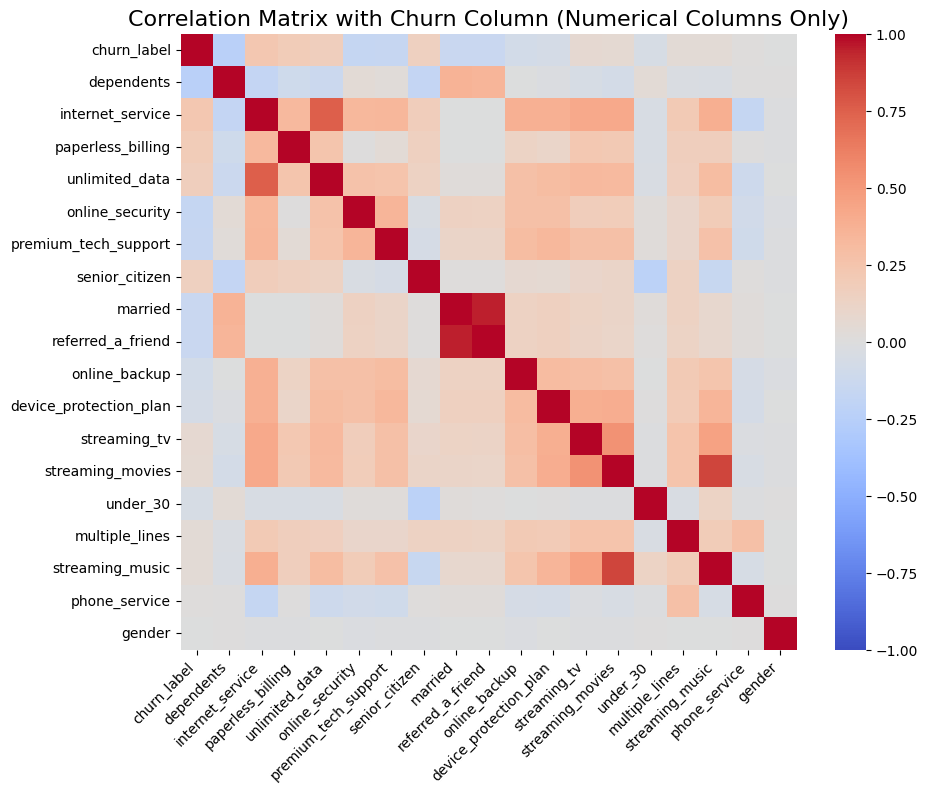

In [1048]:
binary_cols.append('churn_label')
corr_matrix = df[binary_cols].corr()

# Extract the correlations involving the churn column (assuming 'churn_label_Yes' is in numerical_cols)
columns_of_interest = corr_matrix['churn_label'].abs().sort_values(ascending=False).index
selected_corr_matrix = corr_matrix.loc[columns_of_interest, columns_of_interest]

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Correlation Matrix with Churn Column (Numerical Columns Only)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [1049]:
columns_to_exclude = binary_cols + numerical_cols

# Remove 'Churn' from the list of columns to exclude, if it's in the list
columns_to_exclude = [col for col in columns_to_exclude if col != 'churn_label']

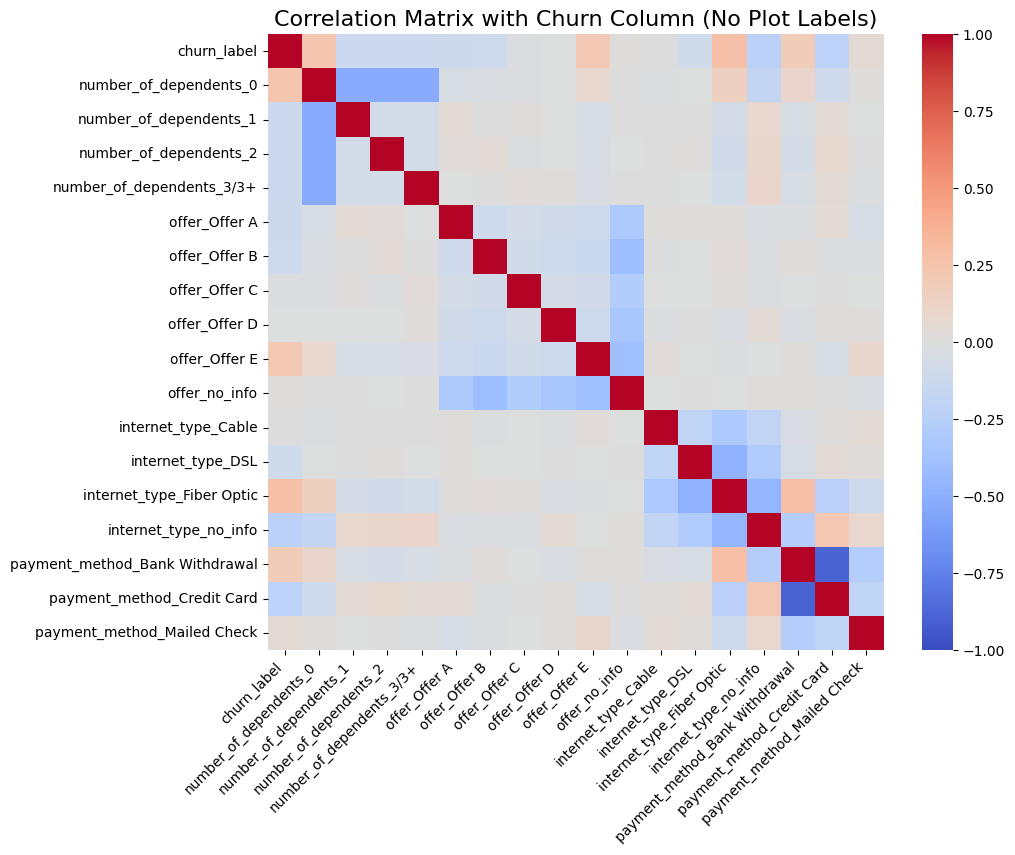

In [1050]:
corr_matrix = df[df.drop(columns=columns_to_exclude).columns.unique()].corr()

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Correlation Matrix with Churn Column (No Plot Labels)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [1051]:
target_correlations = corr_matrix['churn_label']

# Identify features with correlation smaller than 0.01 (absolute value)
low_correlation_features = target_correlations[abs(target_correlations) < 0.05].index

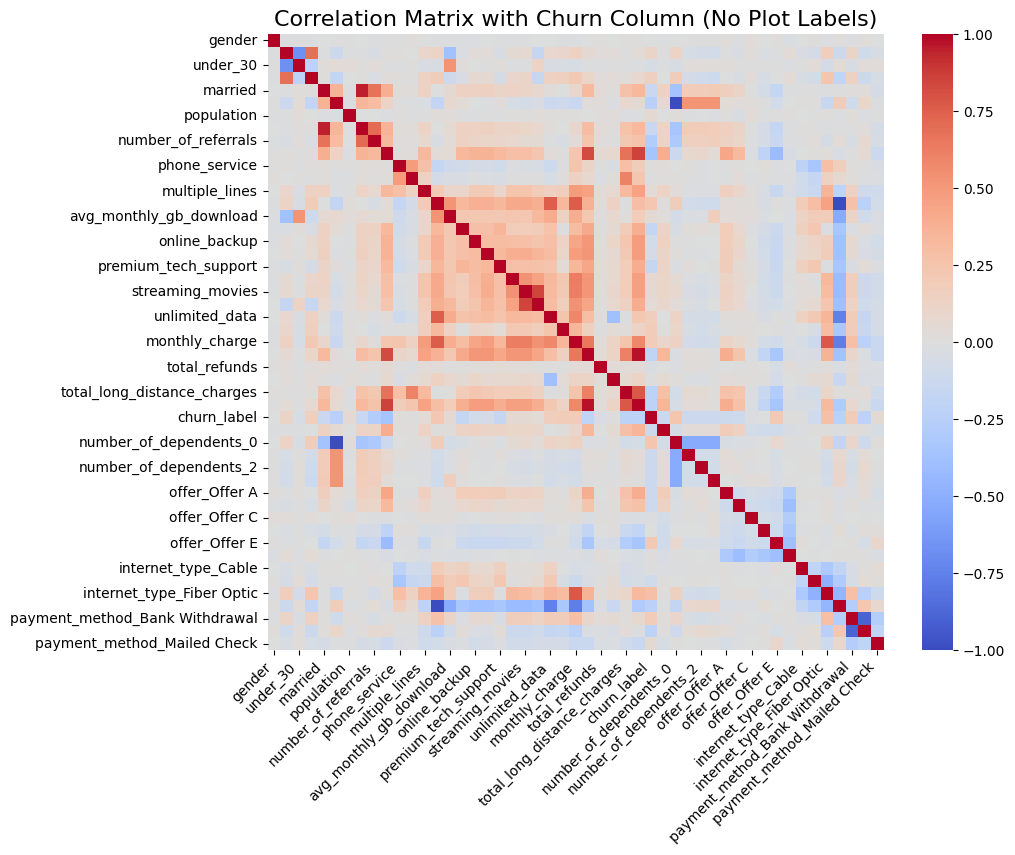

In [1052]:
corr_matrix = df.corr()

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Correlation Matrix with Churn Column (No Plot Labels)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

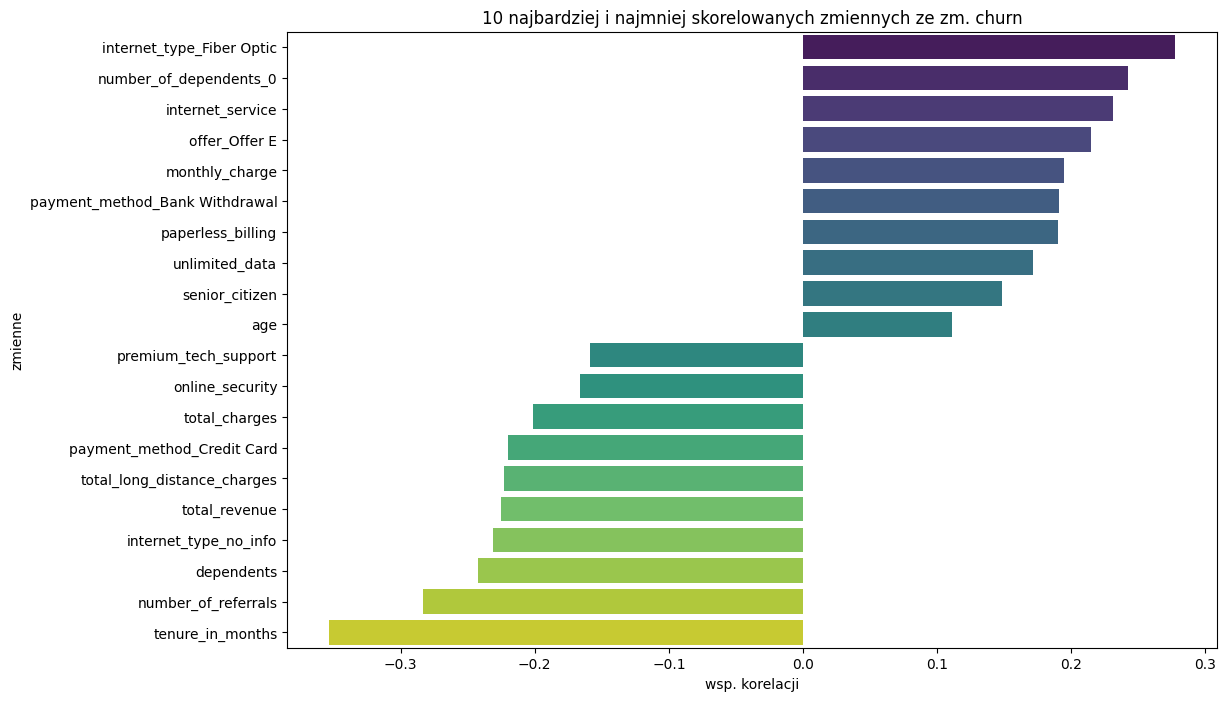

In [1053]:
correlation_matrix = df.corr()
churn_correlation = correlation_matrix['churn_label'].sort_values()
most_correlated = churn_correlation.tail(11).head(10)  # Exclude the 'Churn' correlation with itself
least_correlated = churn_correlation.head(10)
combined_correlations = pd.concat([most_correlated, least_correlated]).sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=combined_correlations.values, y=combined_correlations.index, palette='viridis')
plt.title('10 najbardziej i najmniej skorelowanych zmiennych ze zm. churn')
plt.xlabel('wsp. korelacji')
plt.ylabel('zmienne')
plt.show()

## modeling

How can we improve model? Depends what we aim for?

1. define the problem
1. Here choose a model metric we will be looking to optimise based on market reports and current tactics (google!)

1. EDA and approach to data cleaning manipulation
1. train test split target VAR description

1. Create base LR model to see how it performs
2. See how good can you make LR model by tuning hyperparameters training by using KFOLD / resampling train test and so on
    - we will have lots and lots of variables so using lasso/ ridge could turn out good explain them and see which parameter does the trick
    - adding variable combinations if possible and they make sense as a one way to improve a model
    - outline the advantages of LR such as interpretability of results coefficients and so on

3. ML Methods bagging XGB RandomForest
    - tweaking them by randomgridsearch/ gridsearch
    - train/test rebalancing by undersampling oversampling/ smooten
    - same methods as above 


#### LEVERAGE LIFT USE XD BECAUSE IT SOUNDS WELL

4. Neural network maybe? Idk about the volume of Prior work
5. Sum up the work which model performed better and so on. State that its dependent in use case and recommend using one based on this paper in this case and current trends.

# Train Test Split


In [1054]:
holdout_df = holdout_df.replace({"Female": False, "Male": True})
holdout_df['offer'].fillna('no_info', inplace=True)
holdout_df['internet_type'].fillna('no_info', inplace=True)
# holdout_df['satisfaction_score'] = holdout_df['satisfaction_score'].map(satisfaction_mapping)
holdout_df['number_of_dependents'] = holdout_df['number_of_dependents'].apply(lambda x: '3/3+' if x >= 3 else x).astype(str)
encoded_holdout_df = pd.DataFrame(encoder.fit_transform(holdout_df[cat_cols]))

# Get the original column names and assign them to the encoded dataframe
encoded_holdout_df.columns = encoder.get_feature_names_out(cat_cols)

# Drop the original categorical columns and concatenate the encoded columns
holdout_df = pd.concat([holdout_df.drop(columns=cat_cols).reset_index(drop=True), encoded_holdout_df.reset_index(drop=True)], axis=1)
holdout_df = holdout_df.replace({"No": False, "Yes": True})

In [1055]:
df.shape

(5986, 49)

In [1056]:
holdout_df.shape

(1057, 49)

In [1057]:
X_train = df.drop(columns=['churn_label'])
y_train = df['churn_label']

X_test = holdout_df.drop(columns=['churn_label'])
y_test = holdout_df['churn_label']

In [1058]:
# Assuming X is your feature matrix and y is your target vector
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)

## Baseline model

In [1059]:
def evaluate_model(y_pred_proba, y_test, ret_df=False, plot_roc=False, name='model_name'):
    # Convert probabilities to class predictions based on a threshold of 0.5
    y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Assuming 'Yes' is the positive class
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba[:,1])
    
    print(f"""Model Performance: 
    Accuracy = {round(accuracy*100, 3)}%
    Recall = {round(recall*100, 3)}%
    Precision = {round(precision*100, 3)}%
    F1 Score = {round(f1*100, 3)}%
    """)
    
    if plot_roc == True:
        # Plotting the ROC curve with different thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {round(auc, 3)})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc="lower right")
        print(f'AUC = {round(auc*100, 3)}%')

        # # Annotate the thresholds
        # for i in range(len(thresholds)):
        #     plt.annotate(f'{round(thresholds[i], 2)}', 
        #                 xy=(fpr[i], tpr[i]), 
        #                 textcoords='offset points', 
        #                 xytext=(0, 10), 
        #                 ha='center')
        
    plt.show()

    if ret_df:
        metrics = {
            'model': [name],
            'Accuracy': [accuracy],
            'Recall': [recall],
            'Precision': [precision],
            'F1 Score': [f1],
            'AUC': [auc]
        }
        return pd.DataFrame(metrics)

In [1060]:
def simple_eval(y_pred, y_test, ret_df=False, name='model_name'):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Assuming 'Yes' is the positive class
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred)
    
    print(f"""Model Performance: 
    Accuracy = {round(accuracy*100, 3)}%
    Recall = {round(recall*100, 3)}%
    Precision = {round(precision*100, 3)}%
    F1 Score = {round(f1*100, 3)}%
    AUC = {round(auc*100, 3)}%
    """)

    if ret_df:
        metrics = {
            'model': [name],
            'Accuracy': [accuracy],
            'Recall': [recall],
            'Precision': [precision],
            'F1 Score': [f1],
            'AUC': [auc]
        }
        return pd.DataFrame(metrics)

# KFOLD

In [1061]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1973)

In [1062]:
scoring = make_scorer(f1_score, average='weighted')  # Adjust 'average' depending on your problem

# XGB

In [1063]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [1064]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb=xgb_model.predict_proba(X_test)

Model Performance: 
    Accuracy = 82.214%
    Recall = 61.512%
    Precision = 70.196%
    F1 Score = 65.568%
    
AUC = 87.503%


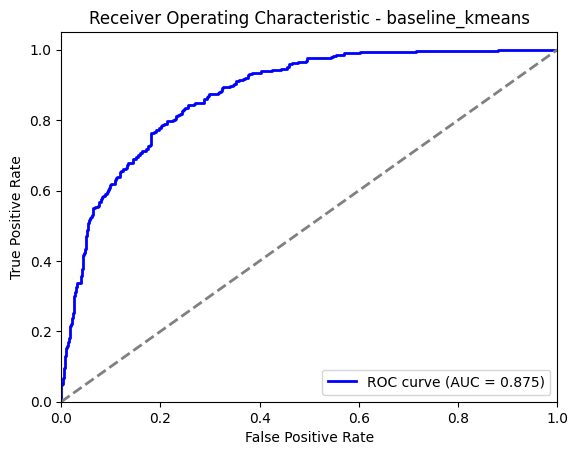

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.822138,0.61512,0.701961,0.655678,0.875028


In [1065]:
evaluate_model(y_proba_xgb,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [1066]:
# Hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': np.linspace(0, 0.5, 5)
}

In [1067]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    scoring=scoring,
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=1973
)

In [1068]:
# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best F1 Score from cross-validation: {random_search.best_score_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.5, 'colsample_bytree': 0.7}
Best F1 Score from cross-validation: 0.8296337474039271


In [1069]:
# Predict on the test set with the best found model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba=best_model.predict_proba(X_test)

Model Performance: 
    Accuracy = 82.498%
    Recall = 60.137%
    Precision = 71.721%
    F1 Score = 65.421%
    
AUC = 88.98%


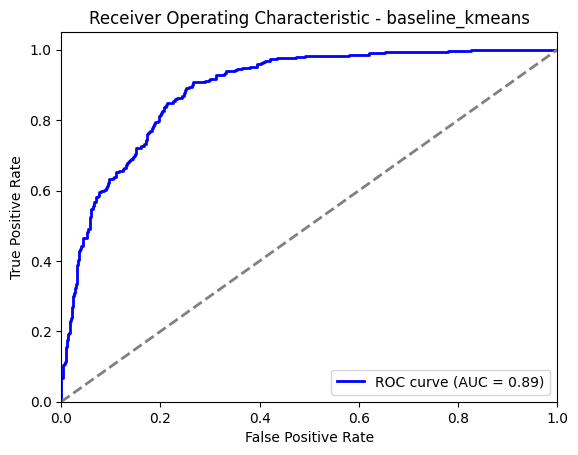

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.824976,0.601375,0.717213,0.654206,0.889797


In [1070]:
evaluate_model(y_pred_proba,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [1071]:

# Get the corresponding feature names
feature_names = X_train.columns

# Combine feature names and importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model.feature_importances_
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

                              Feature  Importance
13                   internet_service    0.292835
43          internet_type_Fiber Optic    0.177306
46         payment_method_Credit Card    0.067302
31             number_of_dependents_0    0.046369
8                 number_of_referrals    0.044280
7                   referred_a_friend    0.036761
23                  paperless_billing    0.034507
5                          dependents    0.034443
29                      total_revenue    0.034183
9                    tenure_in_months    0.024568
20                   streaming_movies    0.018037
15                    online_security    0.016120
18               premium_tech_support    0.012263
24                     monthly_charge    0.010930
14            avg_monthly_gb_download    0.010779
12                     multiple_lines    0.008599
25                      total_charges    0.007882
39                      offer_Offer E    0.007865
3                      senior_citizen    0.007855


In [1072]:
best_params = random_search.best_params_

# Define the grid based on the best parameters from the random search
param_grid = {
    'n_estimators': np.arange(max(50, best_params['n_estimators'] - 50), best_params['n_estimators'] + 100, 50),
    'max_depth': np.arange(max(3, best_params['max_depth'] - 2), best_params['max_depth'] + 3),
    'learning_rate': np.linspace(max(0.01, best_params['learning_rate'] * 0.8), min(0.3, best_params['learning_rate'] * 1.2), 3),
    'subsample': np.clip([best_params['subsample'] * 0.9, best_params['subsample'], best_params['subsample'] * 1.1], 0.6, 1.0),
    # 'colsample_bytree': np.clip([best_params['colsample_bytree'] * 0.9, best_params['colsample_bytree'], best_params['colsample_bytree'] * 1.1], 0.6, 1.0),
    'gamma': np.linspace(max(0, best_params['gamma'] * 0.8), min(0.5, best_params['gamma'] * 1.2), 3)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scoring,
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and predictions
best_grid_model = grid_search.best_estimator_
y_grid_pred = best_grid_model.predict(X_test)
y_grid_pred_proba = best_grid_model.predict_proba(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Model Performance: 
    Accuracy = 82.403%
    Recall = 60.481%
    Precision = 71.255%
    F1 Score = 65.428%
    
AUC = 88.064%


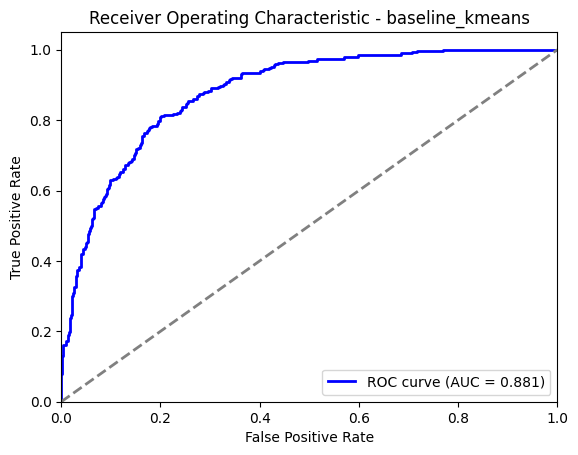

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.82403,0.604811,0.712551,0.654275,0.880645


In [1073]:
evaluate_model(y_grid_pred_proba,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

# RANDOM FOREST

In [1074]:
rf_model = RandomForestClassifier(random_state=1973)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1973)

In [1075]:
y_pred_proba_rf = rf_model.predict_proba(X_test)

Model Performance: 
    Accuracy = 81.457%
    Recall = 53.952%
    Precision = 71.689%
    F1 Score = 61.569%
    
AUC = 87.804%


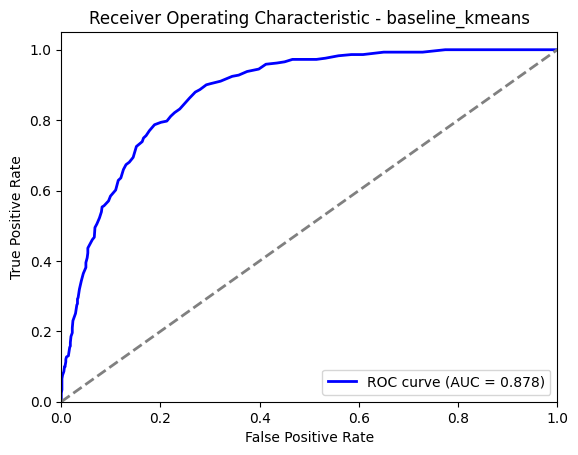

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.81457,0.539519,0.716895,0.615686,0.878038


In [1076]:
evaluate_model(y_pred_proba_rf,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [1077]:
base_grid_rf = {
    'n_estimators': np.arange(100, 1100, 200),
    'max_depth': np.arange(10, 50, 10),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Initialize GridSearchCV with the base grid
grid_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=base_grid_rf,
    scoring='f1',  # or use your preferred scoring metric
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=1973
)

# Fit the grid search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_from_grid = grid_search_rf.best_params_

# Evaluate the best model from grid search
y_pred_proba_rf_grid = grid_search_rf.best_estimator_.predict_proba(X_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model Performance: 
    Accuracy = 81.93%
    Recall = 54.296%
    Precision = 73.148%
    F1 Score = 62.327%
    
AUC = 88.256%


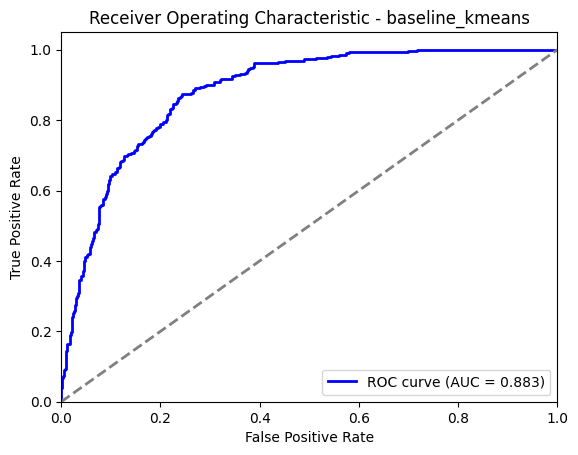

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.8193,0.542955,0.731481,0.623274,0.882565


In [1078]:
evaluate_model(y_pred_proba_rf_grid,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [1083]:
# Expanded grid based on best parameters from the first grid search
refined_grid_rf = {
    'n_estimators': np.unique(np.arange(max(100, best_params_from_grid['n_estimators'] - 200), best_params_from_grid['n_estimators'] + 400, 100)),
    'max_depth': np.unique(np.arange(max(10, best_params_from_grid['max_depth'] - 10), min(50, best_params_from_grid['max_depth'] + 20), 4)),
    'min_samples_split': np.unique(np.arange(max(2, best_params_from_grid['min_samples_split'] - 2), best_params_from_grid['min_samples_split'] + 4, 1)),
    'min_samples_leaf': np.unique(np.arange(max(1, best_params_from_grid['min_samples_leaf'] - 1), best_params_from_grid['min_samples_leaf'] + 2, 1)),
    'max_features': [best_params_from_grid['max_features']],
    'bootstrap': [best_params_from_grid['bootstrap']]
}

# Initialize GridSearchCV with the refined grid
refined_grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=refined_grid_rf,
    scoring='f1',  # or your preferred scoring metric
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
    # random_state=1973
)

# Fit the refined grid search
refined_grid_search_rf.fit(X_train, y_train)

# Evaluate the best model from the refined grid search
best_model_rf = refined_grid_search_rf.best_estimator_
y_pred_proba_rf_refined_grid = best_model_rf.predict_proba(X_test)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


KeyboardInterrupt: 

In [ ]:
evaluate_model(y_pred_proba_rf_refined_grid,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

## Linear Regrssion model

In [ ]:
X_test=X_test.drop(columns='total_revenue')
X_train=X_train.drop(columns='total_revenue')

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
y_proba_lr = model_lr.predict_proba(X_test)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance: 
    Accuracy = 77.483%
    Recall = 44.674%
    Precision = 62.802%
    F1 Score = 52.209%
    
AUC = 80.608%


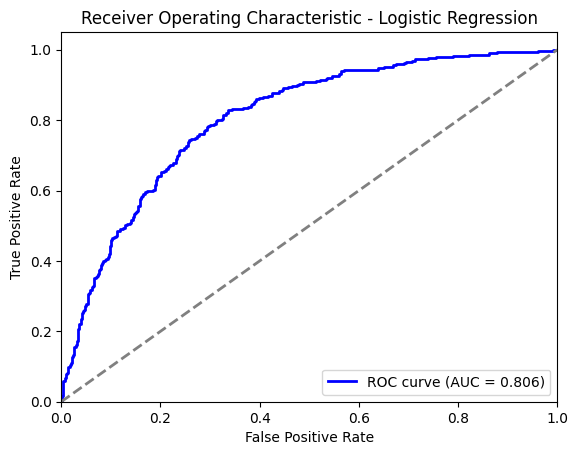

In [ ]:
evaluate_model(y_proba_lr, y_test, name='Logistic Regression', plot_roc=True, ret_df=False)

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_res, y_res)
y_pred = model_lr.predict(X_test)
y_proba_lr = model_lr.predict_proba(X_test)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logistic_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=1973)
# penalty='elasticnet'
# Define a grid of alpha (C) and l1_ratio values
param_grid = {
    'C': [0.01, 0.03, 0.03],  # C is the inverse of regularization strength; smaller values specify stronger regularization
    # 'l1_ratio': [0.1, 0.5 , 0.9]  # Mix ratio for L1 and L2 regularization
}

# Use GridSearchCV to find the best C and l1_ratio
grid_search = RandomizedSearchCV(
  logistic_reg, param_grid, cv=kfold, scoring=scoring,
  random_state=1973,n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1973, shuffle=True),
                   estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                                random_state=1973,
                                                solver='saga'),
                   n_jobs=-1, param_distributions={'C': [0.01, 0.03, 0.03]},
                   random_state=1973,
                   scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [ ]:
# Retrieve the best model and best parameters
best_logistic_net_model = grid_search.best_estimator_
print("Best parameters for Elastic Net Logistic Regression:", grid_search.best_params_)

# Evaluate the best model on the test set
y_pred = best_logistic_net_model.predict(X_test)
y_pred_proba = best_logistic_net_model.predict_proba(X_test)  # Probability estimates for the positive class

Best parameters for Elastic Net Logistic Regression: {'C': 0.01}


Model Performance: 
    Accuracy = 72.469%
    Recall = 1.031%
    Precision = 50.0%
    F1 Score = 2.02%
    
AUC = 71.533%


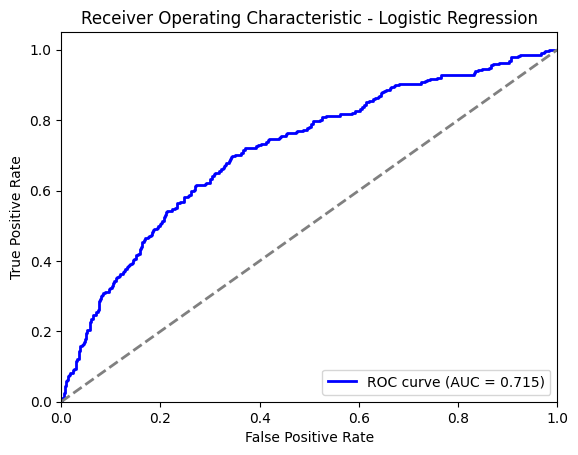

In [ ]:
evaluate_model(y_pred_proba, y_test, name='Logistic Regression', plot_roc=True, ret_df=False)

In [ ]:
proba=model_lr.predict_proba(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

def test_thresh(x,y_test):
    threshold_value=[]
    scores_acc=[]
    scores_f1=[]
    scores_rec=[]
    scores_prec=[]
    scores_auc=[]
    for i in np.linspace(0, 1, 101):
        threshold = i  # You can adjust the threshold as needed
        y_pred_fun = (x[:, 1] > threshold).astype(int)
        threshold_value.append(i)
        scores_acc.append(accuracy_score(y_test, y_pred_fun))
        scores_f1.append(f1_score(y_test, y_pred_fun))
        scores_rec.append(recall_score(y_test, y_pred_fun))
        scores_prec.append(precision_score(y_test, y_pred_fun))
        scores_auc.append(roc_auc_score(y_test, y_pred_fun))

        #scores_roc.append(roc_auc_score(y_test, y_prob))
    return pd.DataFrame({'threshold_value':threshold_value,'score_acc':scores_acc,'score_f1':scores_f1,'score_rec':scores_rec,'score_prec':scores_prec,'auc':scores_auc}).set_index('threshold_value')

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

<Axes: xlabel='threshold_value'>

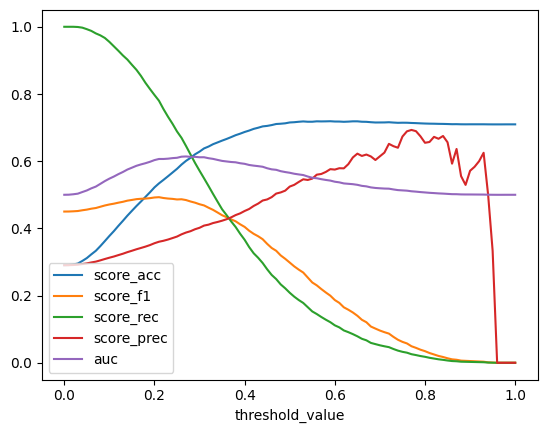

In [ ]:
test_thresh(y_pred_proba,y_test).plot()

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba_lr[:,0])
average_precision = average_precision_score(y_test, y_proba_lr[:,0])